In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import scipy.signal
import scipy
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams.update({'font.size': 16})

In [2]:
def monthly_to_annual(array):
    """ calculate annual mena from monthly data, using unequal month lengths fros noleap calendar.  
    originally written by Keith Lindsay."""
    mon_day  = xr.DataArray(np.array([31.,28.,31.,30.,31.,30.,31.,31.,30.,31.,30.,31.]), dims=['month'])
    mon_wgt  = mon_day/mon_day.sum()
    return (array.rolling(time=12, center=False) # rolling
            .construct("month") # construct the array
            .isel(time=slice(11, None, 12)) # slice so that the first element is [1..12], second is [13..24]
            .dot(mon_wgt, dims=["month"]))

def savgol_filter(array, window, order=2):
    smooth_array = array.copy()
    smooth_array[:] = scipy.signal.savgol_filter(array, window, order)
    return(smooth_array)

In [3]:
fin_cdr_atm = xr.open_dataset('b.e21.B1850.f09_g17.FLAT10-cdr.001.atm_vars.nc')
fin_cdr_lnd = xr.open_dataset('b.e21.B1850.f09_g17.FLAT10-cdr.001.lnd_vars.nc')
fin_cdr_ocn = xr.open_dataset('b.e21.B1850.f09_g17.FLAT10-cdr.001.ocn_vars.nc')
fin_flat10_atm = xr.open_dataset('b.e21.B1850.f09_g17.FLAT10-esm.001.atm_vars.nc')
fin_flat10_lnd = xr.open_dataset('b.e21.B1850.f09_g17.FLAT10-esm.001.lnd_vars.nc')
fin_flat10_ocn = xr.open_dataset('b.e21.B1850.f09_g17.FLAT10-esm.001.ocn_vars.nc')
fin_zec_atm = xr.open_dataset('b.e21.B1850.f09_g17.FLAT10-zec.001.atm_vars.nc')
fin_zec_lnd = xr.open_dataset('b.e21.B1850.f09_g17.FLAT10-zec.001.lnd_vars.nc')
fin_zec_ocn = xr.open_dataset('b.e21.B1850.f09_g17.FLAT10-zec.001.ocn_vars.nc')
fin_ctrl_atm = xr.open_dataset('b.e21.B1850.f09_g17.FLAT10ctrl-esm.001.atm_vars.nc')
fin_ctrl_lnd = xr.open_dataset('b.e21.B1850.f09_g17.FLAT10ctrl-esm.001.lnd_vars.nc')
fin_ctrl_ocn = xr.open_dataset('b.e21.B1850.f09_g17.FLAT10ctrl-esm.001.ocn_vars.nc')

areacella = xr.open_dataset('areacella_fx_CESM2_1pctCO2_r1i1p1f1_gn.nc')
areacello = xr.open_dataset('areacello_Ofx_CESM2_1pctCO2_r1i1p1f1_gn.nc')

sftlf = xr.open_dataset('sftlf_fx_CESM2_1pctCO2_r1i1p1f1_gn.nc')
sftgif = xr.open_dataset('sftgif_fx_CESM2_1pctCO2_r1i1p1f1_gn.nc')

/Users/CDKoven/miniforge3/lib/python3.9/site-packages/xarray/conventions.py:431: SerializationWarning: variable 'areacella' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/CDKoven/miniforge3/lib/python3.9/site-packages/xarray/conventions.py:431: SerializationWarning: variable 'areacello' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/CDKoven/miniforge3/lib/python3.9/site-packages/xarray/conventions.py:431: SerializationWarning: variable 'sftlf' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/Users/CDKoven/miniforge3/lib/python3.9/site-packages/xarray/conventions.py:431: SerializationWarning: variable 'sftgif' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


Text(0.5, 1.0, 'land sink')

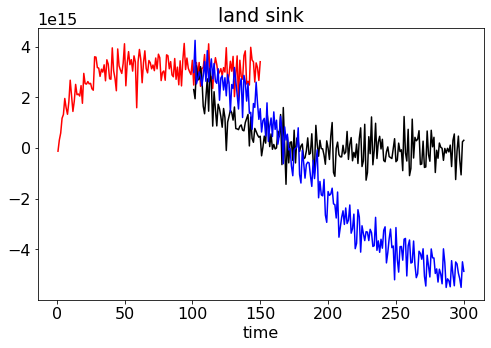

In [4]:
nbp_global_flat10 = (-fin_flat10_lnd['NEE'] * areacella['areacella'].data * sftlf['sftlf'].data/100. * (1. - sftgif['sftgif'].data/100.)).sum(dim=('lat', 'lon'))
nbp_global_flat10['time'] = np.arange(len(nbp_global_flat10['time']))/12.
nbp_global_flat10 = (monthly_to_annual(nbp_global_flat10)*86400. * 365.)
nbp_global_flat10.plot(color='red')

nbp_global_zec = (-fin_zec_lnd['NEE'] * areacella['areacella'].data * sftlf['sftlf'].data/100. * (1. - sftgif['sftgif'].data/100.)).sum(dim=('lat', 'lon'))
nbp_global_zec['time'] = np.arange(len(nbp_global_zec['time']))/12. + 100.
nbp_global_zec = (monthly_to_annual(nbp_global_zec)*86400. * 365.)
nbp_global_zec.plot(color='black')

nbp_global_cdr = (-fin_cdr_lnd['NEE'] * areacella['areacella'].data * sftlf['sftlf'].data/100. * (1. - sftgif['sftgif'].data/100.)).sum(dim=('lat', 'lon'))
nbp_global_cdr['time'] = np.arange(len(nbp_global_cdr['time']))/12. + 100.
nbp_global_cdr = (monthly_to_annual(nbp_global_cdr)*86400. * 365.)
nbp_global_cdr.plot(color='blue')
plt.title('land sink')


Text(0.5, 1.0, 'smoothed land sink')

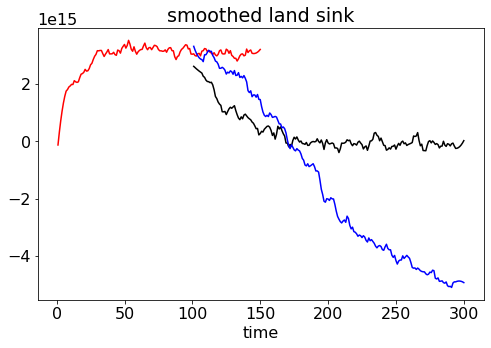

In [5]:
nbp_global_flat10_smooth = savgol_filter(nbp_global_flat10, 13)
nbp_global_zec_smooth = savgol_filter(nbp_global_zec, 13)
nbp_global_cdr_smooth = savgol_filter(nbp_global_cdr, 13)

nbp_global_flat10_smooth.plot(color='red')
nbp_global_zec_smooth.plot(color='black')
nbp_global_cdr_smooth.plot(color='blue')
plt.title('smoothed land sink')

Text(0.5, 1.0, 'ocean sink')

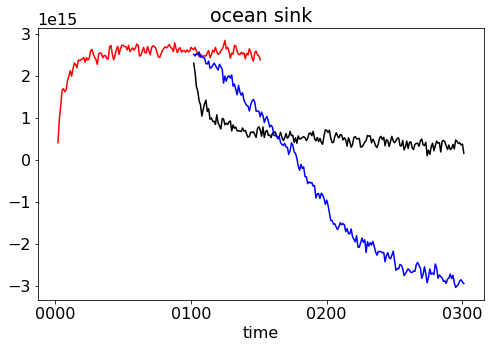

In [6]:
fgco2_global_flat10 = (fin_flat10_ocn['FG_CO2'] * areacello['areacello'].data * 12.0e-8 * 86400. * 365. * 1e3).sum(dim=('nlat', 'nlon'))
fgco2_global_annual_flat10 = monthly_to_annual(fgco2_global_flat10)
fgco2_global_annual_flat10.plot(color='red')

fgco2_global_zec = (fin_zec_ocn['FG_CO2'] * areacello['areacello'].data * 12.0e-8 * 86400. * 365. * 1e3).sum(dim=('nlat', 'nlon'))
fgco2_global_annual_zec = monthly_to_annual(fgco2_global_zec)
fgco2_global_annual_zec.plot(color='black')

fgco2_global_cdr = (fin_cdr_ocn['FG_CO2'] * areacello['areacello'].data * 12.0e-8 * 86400. * 365. * 1e3).sum(dim=('nlat', 'nlon'))
fgco2_global_annual_cdr = monthly_to_annual(fgco2_global_cdr)
fgco2_global_annual_cdr.plot(color='blue')

plt.title('ocean sink')

Text(0.5, 1.0, 'global temperature dynamics')

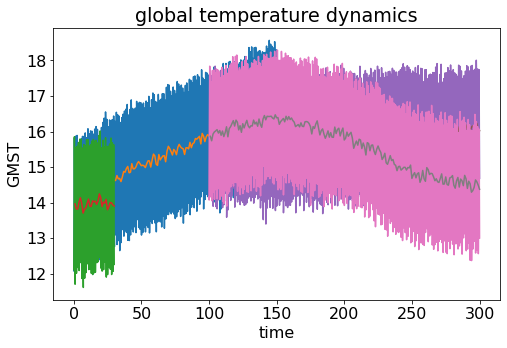

In [7]:
gmst_flat10 =  -273.15 +(fin_flat10_atm['TREFHT'] * areacella['areacella'].data).sum(dim=('lat', 'lon')) / areacella['areacella'].sum(dim=('lat', 'lon'))
gmst_flat10['time'] = np.arange(len(gmst_flat10['time']))/12.
gmst_annual_flat10 = monthly_to_annual(gmst_flat10)
gmst_annual_flat10.attrs['long_name'] = 'GMST'
gmst_flat10.attrs['long_name'] = 'GMST'
gmst_flat10.plot()
gmst_annual_flat10.plot()

gmst_ctrl =  -273.15 +(fin_ctrl_atm['TREFHT'] * areacella['areacella'].data).sum(dim=('lat', 'lon')) / areacella['areacella'].sum(dim=('lat', 'lon'))
gmst_ctrl['time'] = np.arange(len(gmst_ctrl['time']))/12.
gmst_annual_ctrl = monthly_to_annual(gmst_ctrl)
gmst_annual_ctrl.attrs['long_name'] = 'GMST'
gmst_ctrl.attrs['long_name'] = 'GMST'
gmst_ctrl.plot()
gmst_annual_ctrl.plot()

gmst_zec =  -273.15 +(fin_zec_atm['TREFHT'] * areacella['areacella'].data).sum(dim=('lat', 'lon')) / areacella['areacella'].sum(dim=('lat', 'lon'))
gmst_zec['time'] = np.arange(len(gmst_zec['time']))/12. + 100.
gmst_annual_zec = monthly_to_annual(gmst_zec)
gmst_annual_zec.attrs['long_name'] = 'GMST'
gmst_zec.attrs['long_name'] = 'GMST'
gmst_zec.plot()
gmst_annual_zec.plot()

gmst_cdr =  -273.15 +(fin_cdr_atm['TREFHT'] * areacella['areacella'].data).sum(dim=('lat', 'lon')) / areacella['areacella'].sum(dim=('lat', 'lon'))
gmst_cdr['time'] = np.arange(len(gmst_cdr['time']))/12. + 100.
gmst_annual_cdr = monthly_to_annual(gmst_cdr)
gmst_annual_cdr.attrs['long_name'] = 'GMST'
gmst_cdr.attrs['long_name'] = 'GMST'
gmst_cdr.plot()
gmst_annual_cdr.plot()


plt.title('global temperature dynamics')

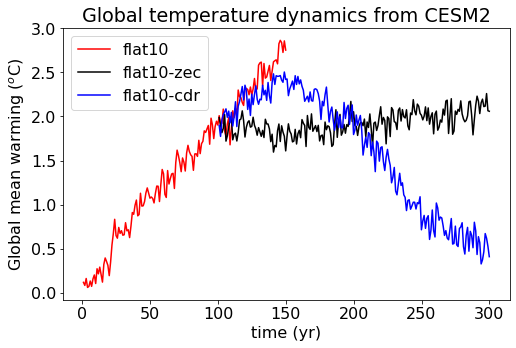

In [8]:
warming_flat10 = gmst_annual_flat10 - gmst_annual_ctrl.mean(dim='time')
warming_zec = gmst_annual_zec - gmst_annual_ctrl.mean(dim='time')
warming_cdr = gmst_annual_cdr - gmst_annual_ctrl.mean(dim='time')

warming_flat10.plot(color='red')
warming_zec.plot(color='black')
warming_cdr.plot(color='blue')

plt.title('Global temperature dynamics from CESM2')
plt.ylabel('Global mean warming ($^o$C)')
plt.xlabel('time (yr)')
plt.legend(['flat10','flat10-zec','flat10-cdr'])

In [9]:
emiss_flat10 = 10. * gmst_annual_flat10['time']/gmst_annual_flat10['time']
emiss_flat10_cum = emiss_flat10.cumsum()

emiss_zec = 0. * gmst_annual_zec['time']/gmst_annual_zec['time']
emiss_zec_cum = emiss_zec.cumsum() + 1000.

emiss_cdr = gmst_annual_cdr['time']/gmst_annual_cdr['time']
emiss_cdr[0:100] = 10.-0.2*emiss_cdr[0:100]*np.arange(100)
emiss_cdr[100:] = -10.*emiss_cdr[100:]
emiss_cdr_cum = emiss_cdr.cumsum() + 1000.

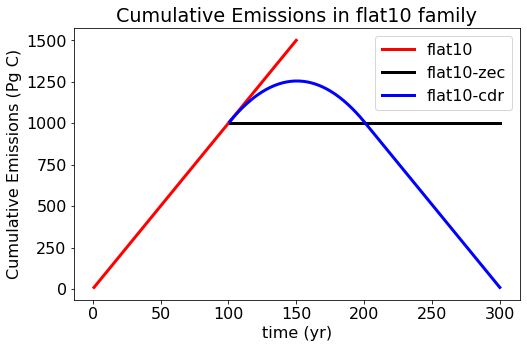

In [10]:
linewidth = 3
emiss_flat10_cum.plot(color='red', linewidth=linewidth)
emiss_zec_cum.plot(color='black', linewidth=linewidth)
emiss_cdr_cum.plot(color='blue', linewidth=linewidth)

plt.title('Cumulative Emissions in flat10 family')
plt.ylabel('Cumulative Emissions (Pg C)')
plt.xlabel('time (yr)')
plt.legend(['flat10','flat10-zec','flat10-cdr'])

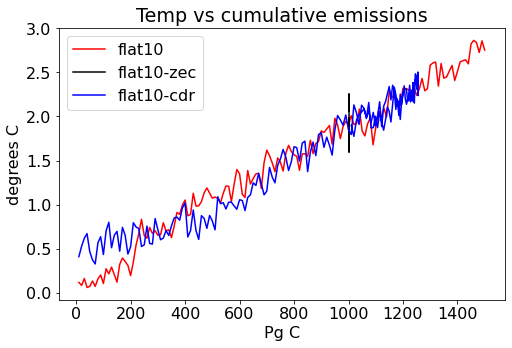

In [11]:
plt.plot(emiss_flat10_cum,warming_flat10, color='red')
plt.plot(emiss_zec_cum,warming_zec, color='black')
plt.plot(emiss_cdr_cum,warming_cdr, color='blue')

plt.title('Temp vs cumulative emissions')
plt.ylabel('degrees C')
plt.xlabel('Pg C')
plt.legend(['flat10','flat10-zec','flat10-cdr'])

In [12]:
warming_flat10_smooth = savgol_filter(warming_flat10, 11)
warming_zec_smooth = savgol_filter(warming_zec, 11)
warming_cdr_smooth = savgol_filter(warming_cdr, 11)


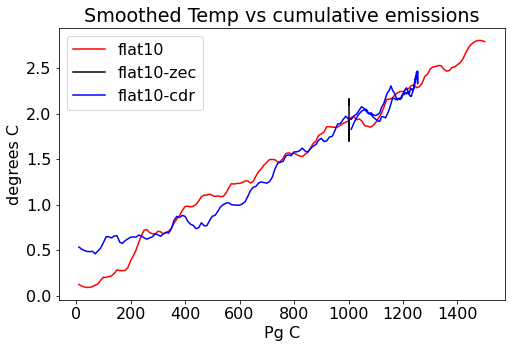

In [13]:
plt.plot(emiss_flat10_cum,warming_flat10_smooth, color='red')
plt.plot(emiss_zec_cum,warming_zec_smooth, color='black')
plt.plot(emiss_cdr_cum,warming_cdr_smooth, color='blue')

plt.title('Smoothed Temp vs cumulative emissions')
plt.ylabel('degrees C')
plt.xlabel('Pg C')
plt.legend(['flat10','flat10-zec','flat10-cdr'])

### define a simple exponential memory function that relates sink strength to prior emissions, and fit to CESM2, starting with the land sink 

i.e.,
$$
  S(t) = \int_{0}^t E(t_{e}) \, a \, e^{\frac{-(t - t_{e})}{\tau}}\,dt_{e}
$$

In [14]:
def memory(emissions, tau, sens):
    nt = len(emissions)
    sink = np.zeros(nt)
    for t in range(nt):
        r = 0
        for tt in range(t):
            r = r + emissions[tt] * sens * np.exp(-(t-tt)/tau)
        sink[t] = r
    return sink
    

In [15]:
def memory_xr(emissions, tau, sens):
    nt = len(emissions)
    sink = 0.*emissions['time']*tau
    for t in range(nt):
        r = 0
        for tt in range(t):
            r = r + emissions[tt] * sens * np.exp(-(t-tt)/tau)
        sink.loc[dict(time=t)] = r
    return sink
    

In [16]:
## define emissions timeseries and land/ocean sinks across full scenarios

emiss = np.zeros(250)
emiss[100:] = 10.

emiss_zec = np.zeros(400)
emiss_zec[100:200] = 10.


emiss_cdr = np.zeros(400)
emiss_cdr[100:200] = 10.
emiss_cdr[200:300] = 10. - np.arange(100)/5
emiss_cdr[300:400] = -10.

time = np.arange(len(emiss)) - 100.
time_zec = np.arange(len(emiss_zec)) - 100.
time_cdr = np.arange(len(emiss_cdr)) - 100.

landsink_flat10 = np.zeros(250)
landsink_flat10[100:] = nbp_global_flat10.data * 1e-15

landsink_zec = np.zeros(400)
landsink_zec[100:200] = nbp_global_flat10[0:100].data * 1e-15
landsink_zec[200:] = nbp_global_zec.data * 1e-15

landsink_cdr = np.zeros(400)
landsink_cdr[100:200] = nbp_global_flat10[0:100].data * 1e-15
landsink_cdr[200:] = nbp_global_cdr.data * 1e-15

oceansink_flat10 = np.zeros(250)
oceansink_flat10[100:] = fgco2_global_annual_flat10.data * 1e-15

oceansink_zec = np.zeros(400)
oceansink_zec[100:200] = fgco2_global_annual_flat10[0:100].data * 1e-15
oceansink_zec[200:] = fgco2_global_annual_zec.data * 1e-15

oceansink_cdr = np.zeros(400)
oceansink_cdr[100:200] = fgco2_global_annual_flat10[0:100].data * 1e-15
oceansink_cdr[200:] = fgco2_global_annual_cdr.data * 1e-15


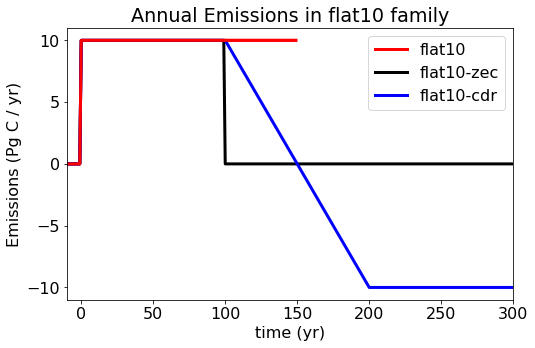

In [17]:
linewidth = 3
plt.plot(time, emiss, color='red', linewidth=linewidth)
plt.plot(time_zec, emiss_zec, color='black', linewidth=linewidth)
plt.plot(time_cdr, emiss_cdr, color='blue', linewidth=linewidth)
plt.plot(time, emiss, color='red', linewidth=linewidth)

plt.xlim([-10,300])
plt.title('Annual Emissions in flat10 family')
plt.ylabel('Emissions (Pg C / yr)')
plt.xlabel('time (yr)')
plt.legend(['flat10','flat10-zec','flat10-cdr'])

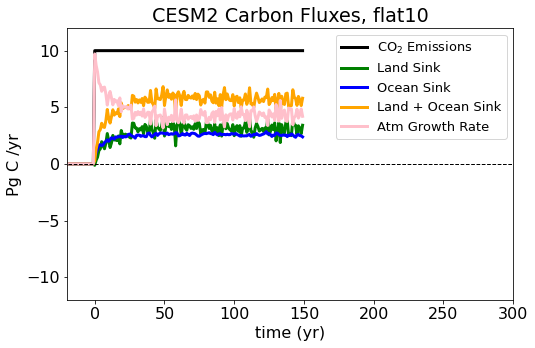

In [18]:
### first make a plot of emissions, land sink, ocean sink, and airborne growth rate
linewidth = 3
plt.plot(time, emiss, color='black', linewidth=linewidth)
plt.plot(time, landsink_flat10, color='green', linewidth=linewidth)
plt.plot(time, oceansink_flat10, color='blue', linewidth=linewidth)
plt.plot(time, (oceansink_flat10 + landsink_flat10), color='orange', linewidth=linewidth)
plt.plot(time, emiss - (oceansink_flat10 + landsink_flat10), color='pink', linewidth=linewidth)

plt.title('CESM2 Carbon Fluxes, flat10')
plt.ylabel('Pg C /yr')
plt.xlabel('time (yr)')
plt.xlim([-20,300])
plt.ylim([-12,12])
plt.hlines(0., -100, 500, color='black', linestyle='dashed', linewidth=1)
plt.legend(['CO$_2$ Emissions','Land Sink','Ocean Sink', 'Land + Ocean Sink', 'Atm Growth Rate'], fontsize="13")


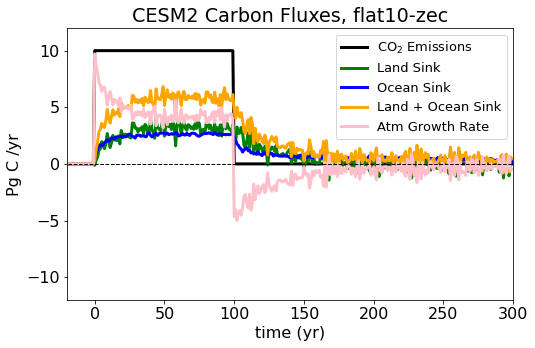

In [19]:
### first make a plot of emissions, land sink, ocean sink, and airborne growth rate

plt.plot(time_zec, emiss_zec, color='black', linewidth=linewidth)
plt.plot(time_zec, landsink_zec, color='green', linewidth=linewidth)
plt.plot(time_zec, oceansink_zec, color='blue', linewidth=linewidth)
plt.plot(time_zec, (oceansink_zec + landsink_zec), color='orange', linewidth=linewidth)
plt.plot(time_zec, emiss_zec - (oceansink_zec + landsink_zec), color='pink', linewidth=linewidth)

plt.title('CESM2 Carbon Fluxes, flat10-zec')
plt.ylabel('Pg C /yr')
plt.xlabel('time (yr)')
plt.xlim([-20,300])
plt.ylim([-12,12])
plt.hlines(0., -100, 500, color='black', linestyle='dashed', linewidth=1)
plt.legend(['CO$_2$ Emissions','Land Sink','Ocean Sink', 'Land + Ocean Sink', 'Atm Growth Rate'], fontsize="13")


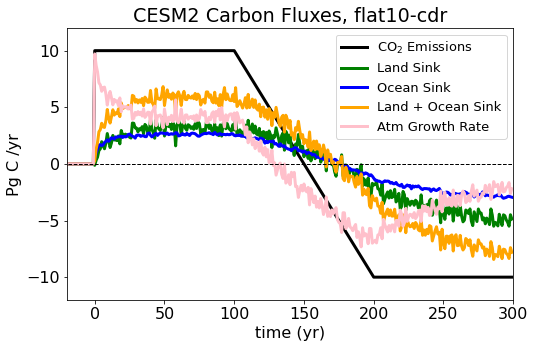

In [20]:
### first make a plot of emissions, land sink, ocean sink, and airborne growth rate

plt.plot(time_cdr, emiss_cdr, color='black', linewidth=linewidth)
plt.plot(time_cdr, landsink_cdr, color='green', linewidth=linewidth)
plt.plot(time_cdr, oceansink_cdr, color='blue', linewidth=linewidth)
plt.plot(time_cdr, (oceansink_cdr + landsink_cdr), color='orange', linewidth=linewidth)
plt.plot(time_cdr, emiss_cdr - (oceansink_cdr + landsink_cdr), color='pink', linewidth=linewidth)

plt.title('CESM2 Carbon Fluxes, flat10-cdr')
plt.ylabel('Pg C /yr')
plt.xlabel('time (yr)')
plt.xlim([-20,300])
plt.ylim([-12,12])
plt.hlines(0., -100, 500, color='black', linestyle='dashed', linewidth=1)
plt.legend(['CO$_2$ Emissions','Land Sink','Ocean Sink', 'Land + Ocean Sink', 'Atm Growth Rate'], fontsize="13")


In [21]:
params, fit = scipy.optimize.curve_fit(memory, emiss, landsink_flat10, [12., 0.03])
print(params)

[10.44610243  0.0317134 ]


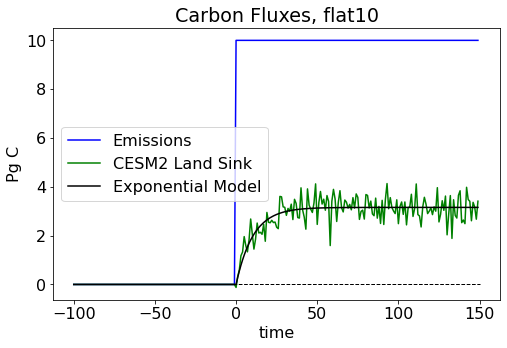

In [22]:
pred_landsink = memory(emiss, params[0], params[1])

plt.plot(time, emiss, color='blue')
plt.plot(time, landsink_flat10, color='green')
plt.plot(time, pred_landsink, color='black')

plt.title('Carbon Fluxes, flat10')
plt.ylabel('Pg C')
plt.xlabel('time')
plt.hlines(0., -100, 150, color='black', linestyle='dashed', linewidth=1)
plt.legend(['Emissions','CESM2 Land Sink','Exponential Model'])

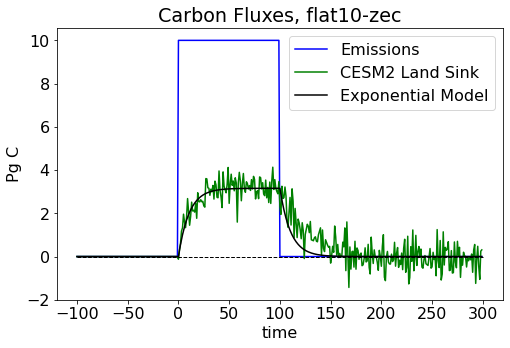

In [23]:
pred_landsink_zec = memory(emiss_zec, params[0], params[1])

plt.plot(time_zec, emiss_zec, color='blue')
plt.plot(time_zec, landsink_zec, color='green')
plt.plot(time_zec, pred_landsink_zec, color='black')

plt.title('Carbon Fluxes, flat10-zec')
plt.ylabel('Pg C')
plt.xlabel('time')
plt.hlines(0., -100, 300, color='black', linestyle='dashed', linewidth=1)
plt.legend(['Emissions','CESM2 Land Sink','Exponential Model'])
plt.savefig('landc_zec_response', dpi=300)


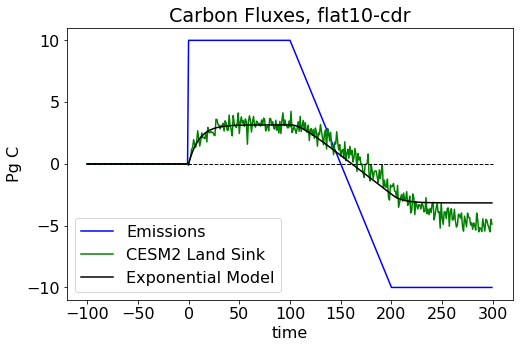

In [24]:
pred_landsink_cdr = memory(emiss_cdr, params[0], params[1])

plt.plot(time_cdr, emiss_cdr, color='blue')
plt.plot(time_cdr, landsink_cdr, color='green')
plt.plot(time_cdr, pred_landsink_cdr, color='black')

plt.title('Carbon Fluxes, flat10-cdr')
plt.ylabel('Pg C')
plt.xlabel('time')
plt.hlines(0., -100, 300, color='black', linestyle='dashed', linewidth=1)
plt.legend(['Emissions','CESM2 Land Sink','Exponential Model'])

### Do the same thing, but for the ocean.

In [25]:
params_ocean, fit_ocean = scipy.optimize.curve_fit(memory, emiss, oceansink_flat10, [12., 0.03])
print(params_ocean)

[4.73895798 0.06035708]


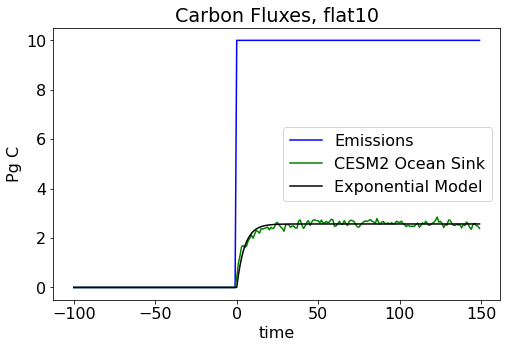

In [26]:
pred_oceansink = memory(emiss, params_ocean[0], params_ocean[1])

plt.plot(time, emiss, color='blue')
plt.plot(time, oceansink_flat10, color='green')
plt.plot(time, pred_oceansink, color='black')

plt.title('Carbon Fluxes, flat10')
plt.ylabel('Pg C')
plt.xlabel('time')
plt.legend(['Emissions','CESM2 Ocean Sink','Exponential Model'])

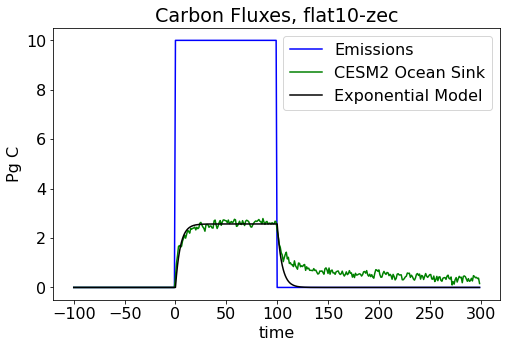

In [27]:
pred_oceansink_zec = memory(emiss_zec, params_ocean[0], params_ocean[1])

plt.plot(time_zec, emiss_zec, color='blue')
plt.plot(time_zec, oceansink_zec, color='green')
plt.plot(time_zec, pred_oceansink_zec, color='black')

plt.title('Carbon Fluxes, flat10-zec')
plt.ylabel('Pg C')
plt.xlabel('time')
plt.legend(['Emissions','CESM2 Ocean Sink','Exponential Model'])

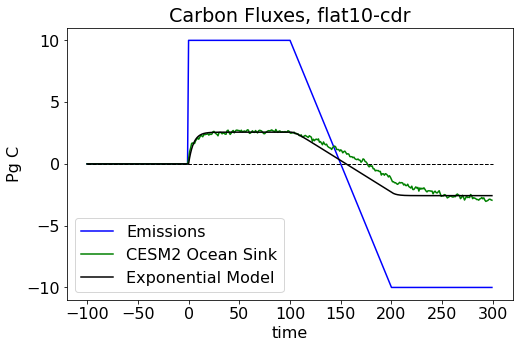

In [28]:
pred_oceansink_cdr = memory(emiss_cdr, params_ocean[0], params_ocean[1])

plt.plot(time_cdr, emiss_cdr, color='blue')
plt.plot(time_cdr, oceansink_cdr, color='green')
plt.plot(time_cdr, pred_oceansink_cdr, color='black')

plt.title('Carbon Fluxes, flat10-cdr')
plt.ylabel('Pg C')
plt.xlabel('time')
plt.hlines(0., -100, 300, color='black', linestyle='dashed', linewidth=1)
plt.legend(['Emissions','CESM2 Ocean Sink','Exponential Model'])

### and now do the fit to combined land plus ocean sink

In [29]:
params_total, fit_total = scipy.optimize.curve_fit(memory, emiss, oceansink_flat10 + landsink_flat10, [12., 0.03])
print(params_ocean)

[4.73895798 0.06035708]


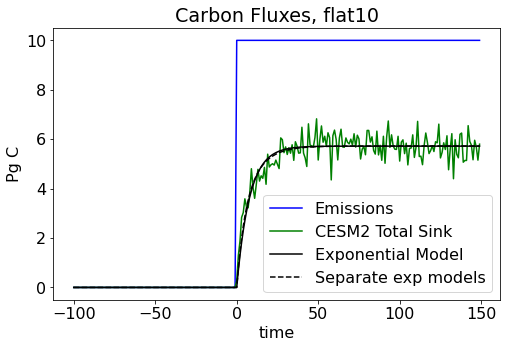

In [30]:
pred_totalsink = memory(emiss, params_total[0], params_total[1])

plt.plot(time, emiss, color='blue')
plt.plot(time, oceansink_flat10 + landsink_flat10, color='green')
plt.plot(time, pred_totalsink, color='black')
plt.plot(time, pred_landsink + pred_oceansink, color='black', linestyle='dashed')

plt.title('Carbon Fluxes, flat10')
plt.ylabel('Pg C')
plt.xlabel('time')
plt.legend(['Emissions','CESM2 Total Sink','Exponential Model', 'Separate exp models'])

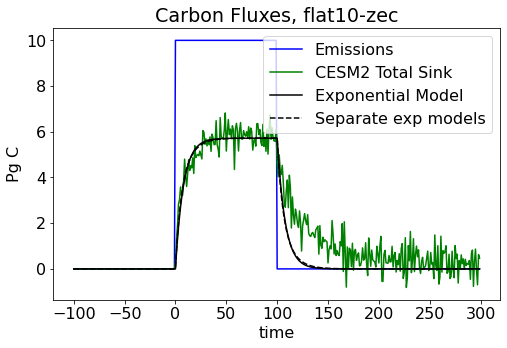

In [31]:
pred_totalsink_zec = memory(emiss_zec, params_total[0], params_total[1])

plt.plot(time_zec, emiss_zec, color='blue')
plt.plot(time_zec, oceansink_zec+landsink_zec, color='green')
plt.plot(time_zec, pred_totalsink_zec, color='black')
plt.plot(time_zec, pred_landsink_zec + pred_oceansink_zec, color='black', linestyle='dashed')


plt.title('Carbon Fluxes, flat10-zec')
plt.ylabel('Pg C')
plt.xlabel('time')
plt.legend(['Emissions','CESM2 Total Sink','Exponential Model', 'Separate exp models'])

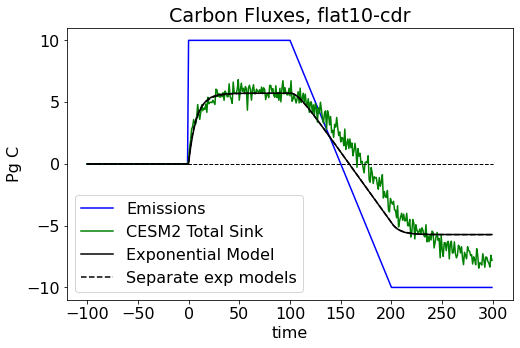

In [32]:
pred_totalsink_cdr = memory(emiss_cdr, params_total[0], params_total[1])

plt.plot(time_cdr, emiss_cdr, color='blue')
plt.plot(time_cdr, landsink_cdr+oceansink_cdr, color='green')
plt.plot(time_cdr, pred_totalsink_cdr, color='black')
plt.plot(time_cdr, pred_landsink_cdr + pred_oceansink_cdr, color='black', linestyle='dashed')

plt.title('Carbon Fluxes, flat10-cdr')
plt.ylabel('Pg C')
plt.xlabel('time')
plt.hlines(0., -100, 300, color='black', linestyle='dashed', linewidth=1)
plt.legend(['Emissions','CESM2 Total Sink','Exponential Model', 'Separate exp models'])

### try a two-timescale memory model fit to flat10zec, and apply to flat10-cdr


i.e.,
$$
  S(t) = \int_0^t  E(t_{e}) \left( a_1 \, e^{\frac{-(t - t_{e})}{\tau_1}} + a_2 \, e^{\frac{-(t - t_{e})}{\tau_2}} \right) \,dt_{e}
$$

In [33]:
def memory_2timescale(emissions, tau1, tau2, sens1, sens2):
    nt = len(emissions)
    sink = np.zeros(nt)
    for t in range(nt):
        r = 0
        for tt in range(t):
            r = r + emissions[tt] * (sens1 * np.exp(-(t-tt)/tau1) + sens2 * np.exp(-(t-tt)/tau2))
        sink[t] = r
    return sink
    

In [34]:
params_combined_2timescale, fit_combined_2timescale = scipy.optimize.curve_fit(memory_2timescale, emiss_zec, landsink_zec + oceansink_zec, [10., 100., 0.02, 0.001])
print(params_combined_2timescale)

[4.59572290e+00 6.25595343e+01 9.47477719e-02 5.08351065e-03]


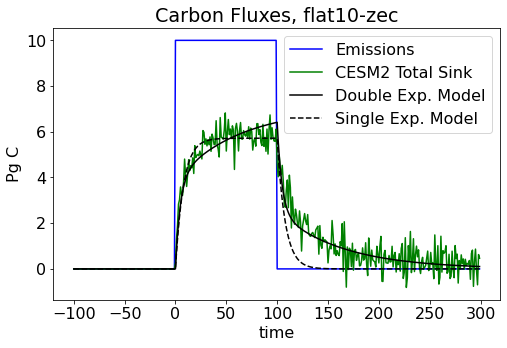

In [35]:
pred_totalsink_2timescale_zec = memory_2timescale(emiss_zec, params_combined_2timescale[0], params_combined_2timescale[1], params_combined_2timescale[2], params_combined_2timescale[3])

plt.plot(time_zec, emiss_zec, color='blue')
plt.plot(time_zec, oceansink_zec+landsink_zec, color='green')
plt.plot(time_zec, pred_totalsink_2timescale_zec, color='black')
plt.plot(time_cdr, pred_totalsink_zec, color='black', linestyle='dashed')


plt.title('Carbon Fluxes, flat10-zec')
plt.ylabel('Pg C')
plt.xlabel('time')
plt.legend(['Emissions','CESM2 Total Sink','Double Exp. Model', 'Single Exp. Model'])

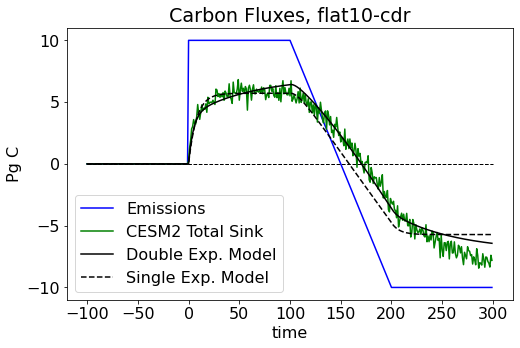

In [36]:
pred_totalsink_2timescale_cdr = memory_2timescale(emiss_cdr, params_combined_2timescale[0], params_combined_2timescale[1], params_combined_2timescale[2], params_combined_2timescale[3])

plt.plot(time_cdr, emiss_cdr, color='blue')
plt.plot(time_cdr, landsink_cdr+oceansink_cdr, color='green')
plt.plot(time_cdr, pred_totalsink_2timescale_cdr, color='black')
plt.plot(time_cdr, pred_totalsink_cdr, color='black', linestyle='dashed')

plt.title('Carbon Fluxes, flat10-cdr')
plt.ylabel('Pg C')
plt.xlabel('time')
plt.hlines(0., -100, 300, color='black', linestyle='dashed', linewidth=1)
plt.legend(['Emissions','CESM2 Total Sink','Double Exp. Model', 'Single Exp. Model'])

Text(0.5, 1.0, 'zonal mean change in temperature, flat10')

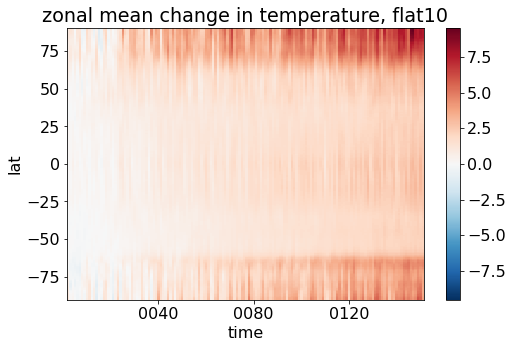

In [37]:
(monthly_to_annual(fin_flat10_atm['TREFHT']).mean(dim='lon') - monthly_to_annual(fin_ctrl_atm['TREFHT']).mean(dim='time').mean(dim='lon')).plot(x='time', y='lat')
plt.title('zonal mean change in temperature, flat10')


Text(0.5, 1.0, 'zonal mean change in temperature, flat10-cdr')

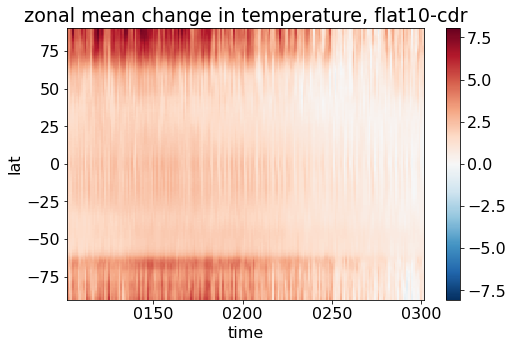

In [38]:
(monthly_to_annual(fin_cdr_atm['TREFHT']).mean(dim='lon') - monthly_to_annual(fin_ctrl_atm['TREFHT']).mean(dim='time').mean(dim='lon')).plot(x='time', y='lat')
plt.title('zonal mean change in temperature, flat10-cdr')


Text(0.5, 1.0, 'zonal mean change in temperature, flat10-zec')

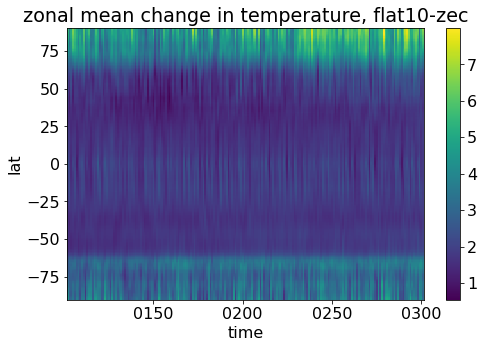

In [39]:
(monthly_to_annual(fin_zec_atm['TREFHT']).mean(dim='lon') - monthly_to_annual(fin_ctrl_atm['TREFHT']).mean(dim='time').mean(dim='lon')).plot(x='time', y='lat')
plt.title('zonal mean change in temperature, flat10-zec')


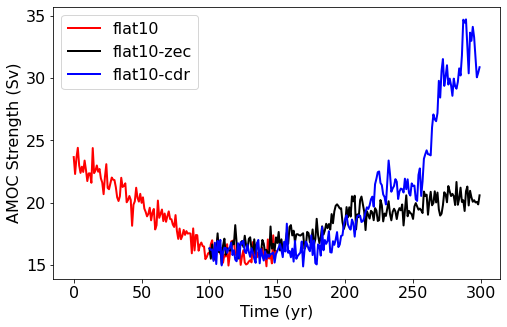

In [40]:
amoc_annual_flat10 = monthly_to_annual(fin_flat10_ocn['MOC'].isel(transport_reg=1).sum(dim='moc_comp')).max(dim='moc_z').max(dim='lat_aux_grid')
amoc_annual_flat10['time'] = np.arange(len(amoc_annual_flat10['time']))
amoc_annual_flat10.attrs['long_name'] = 'Atlantic Meridional Overturning Circulation (Sv)'
amoc_annual_flat10.plot(linewidth=2, color='red')

amoc_annual_zec = monthly_to_annual(fin_zec_ocn['MOC'].isel(transport_reg=1).sum(dim='moc_comp')).max(dim='moc_z').max(dim='lat_aux_grid')
amoc_annual_zec['time'] = np.arange(len(amoc_annual_zec['time'])) + 100.
amoc_annual_zec.plot(linewidth=2, color='black')

amoc_annual_cdr = monthly_to_annual(fin_cdr_ocn['MOC'].isel(transport_reg=1).sum(dim='moc_comp')).max(dim='moc_z').max(dim='lat_aux_grid')
amoc_annual_cdr['time'] = np.arange(len(amoc_annual_cdr['time'])) + 100.
amoc_annual_cdr.plot(linewidth=2, color='blue')

plt.xlabel('Time (yr)')
plt.ylabel('AMOC Strength (Sv)')
plt.legend(['flat10','flat10-zec','flat10-cdr'])


In [41]:
t_1000 = warming_flat10_smooth[90:110].mean()
t_zec50 = warming_zec_smooth[40:60].mean()
t_zec100 = warming_zec_smooth[90:110].mean()
zec50 = t_zec50 - t_1000
zec100 = t_zec100 - t_1000
print('t_1000',t_1000.data)
print('t_zec50',t_zec50.data)
print('t_zec100',t_zec100.data)
print('zec50',zec50.data)
print('zec100',zec100.data)

t_1000 1.8856720482204161
t_zec50 1.7776084907162208
t_zec100 1.9157214213195697
zec50 -0.10806355750419527
zec100 0.030049373099153565


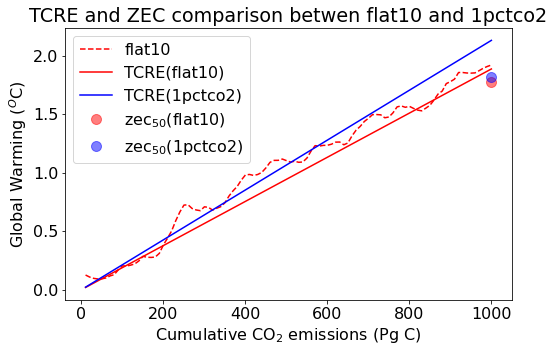

In [42]:
tcre_cesm2_arora = 2.13
zec50_cesm2_macdougall = -0.31
zec100_cesm2_macdougall = -0.34
plt.plot(emiss_flat10_cum[0:100],warming_flat10_smooth[0:100], color='red', linestyle='dashed')
plt.plot(emiss_flat10_cum[0:100], t_1000 * emiss_flat10_cum[0:100]/1e3, color='red')
plt.plot(emiss_flat10_cum[0:100], tcre_cesm2_arora * emiss_flat10_cum[0:100]/1e3, color='blue')
plt.plot(1000., t_zec50, 'o', color='red', markersize=10, alpha=0.5, linewidth=10)
plt.plot(1000., tcre_cesm2_arora + zec50_cesm2_macdougall, 'o', color='blue', markersize=10, alpha=0.5)

plt.title('TCRE and ZEC comparison betwen flat10 and 1pctco2')
plt.ylabel('Global Warming ($^O$C)')
plt.xlabel('Cumulative CO$_2$ emissions (Pg C)')
plt.legend(['flat10','TCRE(flat10)','TCRE(1pctco2)','zec$_{50}$(flat10)','zec$_{50}$(1pctco2)'])

### redo the land, but for live and dead carbon separately

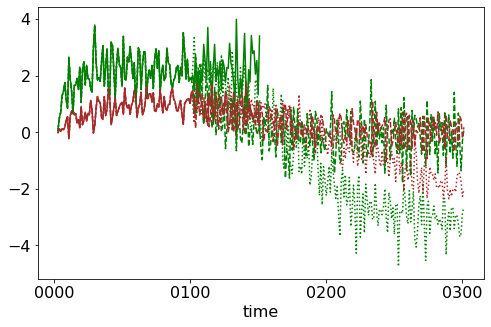

In [43]:
cveg_global_flat10 = (fin_flat10_lnd['TOTVEGC'] * areacella['areacella'].data * sftlf['sftlf'].data/100. * (1. - sftgif['sftgif'].data/100.)).sum(dim=('lat', 'lon'))
d_vegc_dt_flat10 = monthly_to_annual(cveg_global_flat10).diff(dim='time') / 1e15
d_vegc_dt_flat10.plot(color='green')

cdead_global_flat10 = ((fin_flat10_lnd['TOTSOMC']+fin_flat10_lnd['TOTLITC']+fin_flat10_lnd['CWDC']) * areacella['areacella'].data * sftlf['sftlf'].data/100. * (1. - sftgif['sftgif'].data/100.)).sum(dim=('lat', 'lon'))
d_deadc_dt_flat10 = monthly_to_annual(cdead_global_flat10).diff(dim='time') / 1e15
d_deadc_dt_flat10.plot(color='brown')

cveg_global_zec = (fin_zec_lnd['TOTVEGC'] * areacella['areacella'].data * sftlf['sftlf'].data/100. * (1. - sftgif['sftgif'].data/100.)).sum(dim=('lat', 'lon'))
cveg_global_cdr = (fin_cdr_lnd['TOTVEGC'] * areacella['areacella'].data * sftlf['sftlf'].data/100. * (1. - sftgif['sftgif'].data/100.)).sum(dim=('lat', 'lon'))

cdead_global_zec = ((fin_zec_lnd['TOTSOMC']+fin_zec_lnd['TOTLITC']+fin_zec_lnd['CWDC']) * areacella['areacella'].data * sftlf['sftlf'].data/100. * (1. - sftgif['sftgif'].data/100.)).sum(dim=('lat', 'lon'))
cdead_global_cdr = ((fin_cdr_lnd['TOTSOMC']+fin_cdr_lnd['TOTLITC']+fin_cdr_lnd['CWDC']) * areacella['areacella'].data * sftlf['sftlf'].data/100. * (1. - sftgif['sftgif'].data/100.)).sum(dim=('lat', 'lon'))

d_vegc_dt_zec = monthly_to_annual(xr.concat((cveg_global_flat10.isel(time=slice(0,1200)),cveg_global_zec), dim='time')).diff(dim='time') / 1e15
d_vegc_dt_cdr = monthly_to_annual(xr.concat((cveg_global_flat10.isel(time=slice(0,1200)),cveg_global_cdr), dim='time')).diff(dim='time') / 1e15

d_vegc_dt_zec.plot(color='green', linestyle='dashed')
d_vegc_dt_cdr.plot(color='green', linestyle='dotted')

d_deadc_dt_zec = monthly_to_annual(xr.concat((cdead_global_flat10.isel(time=slice(0,1200)),cdead_global_zec), dim='time')).diff(dim='time') / 1e15
d_deadc_dt_cdr = monthly_to_annual(xr.concat((cdead_global_flat10.isel(time=slice(0,1200)),cdead_global_cdr), dim='time')).diff(dim='time') / 1e15

d_deadc_dt_zec.plot(color='brown', linestyle='dashed')
d_deadc_dt_cdr.plot(color='brown', linestyle='dotted')

#plt.hlines(0., -0, 300, color='black', linestyle='dashed', linewidth=1)

                                            

[6.683589   0.03578554]


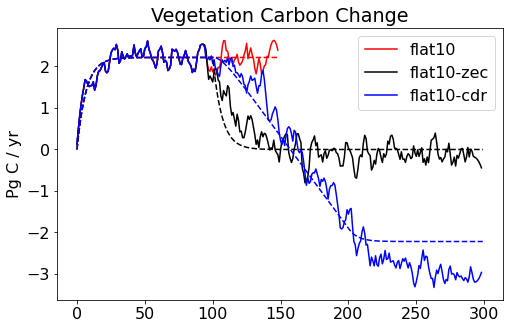

In [44]:
params_cveg, fit_cveg = scipy.optimize.curve_fit(memory, emiss[101:], d_vegc_dt_flat10, [12., 0.03])
print(params_cveg)

pred_dcveg_dt_flat10 = memory(emiss[100:], params_cveg[0], params_cveg[1])
pred_dcveg_dt_zec = memory(emiss_zec[100:], params_cveg[0], params_cveg[1])
pred_dcveg_dt_cdr = memory(emiss_cdr[100:], params_cveg[0], params_cveg[1])


plt.plot(np.arange(len(d_vegc_dt_flat10)), savgol_filter(d_vegc_dt_flat10.data,11), color='red')
plt.plot(np.arange(len(d_vegc_dt_zec)), savgol_filter(d_vegc_dt_zec.data,11), color='black')
plt.plot(np.arange(len(d_vegc_dt_cdr)), savgol_filter(d_vegc_dt_cdr.data,11), color='blue')
plt.plot(np.arange(len(pred_dcveg_dt_flat10)),pred_dcveg_dt_flat10, color='red', linestyle='dashed')
plt.plot(np.arange(len(pred_dcveg_dt_zec)),pred_dcveg_dt_zec, color='black', linestyle='dashed')
plt.plot(np.arange(len(pred_dcveg_dt_cdr)),pred_dcveg_dt_cdr, color='blue', linestyle='dashed')

plt.title('Vegetation Carbon Change')
plt.ylabel('Pg C / yr')
plt.legend(['flat10','flat10-zec','flat10-cdr'])

[1.74395617e+01 5.78344822e-03]


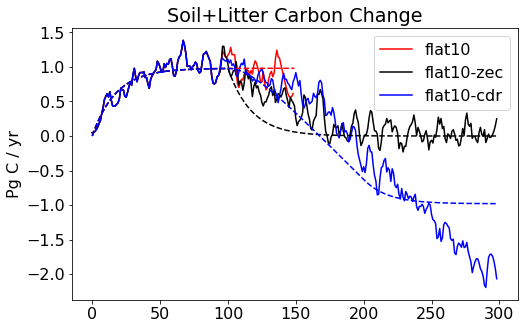

In [45]:
params_cdead, fit_cdead = scipy.optimize.curve_fit(memory, emiss[101:], d_deadc_dt_flat10, [12., 0.03])
print(params_cdead)

pred_dcdead_dt_flat10 = memory(emiss[100:], params_cdead[0], params_cdead[1])
pred_dcdead_dt_zec = memory(emiss_zec[100:], params_cdead[0], params_cdead[1])
pred_dcdead_dt_cdr = memory(emiss_cdr[100:], params_cdead[0], params_cdead[1])


plt.plot(np.arange(len(d_deadc_dt_flat10)), savgol_filter(d_deadc_dt_flat10.data,11), color='red')
plt.plot(np.arange(len(d_deadc_dt_zec)), savgol_filter(d_deadc_dt_zec.data,11), color='black')
plt.plot(np.arange(len(d_deadc_dt_cdr)), savgol_filter(d_deadc_dt_cdr.data,11), color='blue')
plt.plot(np.arange(len(pred_dcdead_dt_flat10)),pred_dcdead_dt_flat10, color='red', linestyle='dashed')
plt.plot(np.arange(len(pred_dcdead_dt_zec)),pred_dcdead_dt_zec, color='black', linestyle='dashed')
plt.plot(np.arange(len(pred_dcdead_dt_cdr)),pred_dcdead_dt_cdr, color='blue', linestyle='dashed')

plt.title('Soil+Litter Carbon Change')
plt.ylabel('Pg C / yr')
plt.legend(['flat10','flat10-zec','flat10-cdr'])

### try the single exponential model on each gridcell for land. what are the parameters?

In [46]:
# stop the notebook here.
#raise RuntimeError

In [47]:
nbp_annual = - monthly_to_annual(fin_flat10_lnd['NEE'])

In [48]:
# calculating parameters for all gricells is slow, so we need to parallelize.

from dask.distributed import Client

client = Client(n_workers=8)

In [49]:
def my_function(func, x, y, params_in, i, j):
    try:
        params, fit = scipy.optimize.curve_fit(func, x, y, params_in)
    except:
        params = [np.nan, np.nan]
    return [i,j, params[0], params[1]]

In [50]:
tau_land_map = sftlf['sftlf']/sftlf['sftlf']
emiss_land_map = sftlf['sftlf']/sftlf['sftlf']

params_list = []
#for i in range(30,31):
for i in range(len(tau_land_map['lon'])):
    for j in range(len(tau_land_map['lat'])):
        if tau_land_map.isel(lat=j,lon=i) == 1.:
                params_out = client.submit(my_function, memory, emiss[100:], nbp_annual.isel(lat=j,lon=i), [12., 1e-9], i, j)
                params_list.append(params_out)
    #print('finished lon',i)
#tau_land_map.plot()
results = client.gather(params_list)
client.close()

/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/Users/CDKoven/miniforge3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/Users/CDKoven/miniforge3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/Users/CDKoven/miniforge3/lib/python3.

/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered

/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered

/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered

/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered

/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered

/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered

/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered

/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered

/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered

In [51]:
for l in range(len(results)):
    i,j, tau, a = results[l]
    tau_land_map[j,i] = tau
    emiss_land_map[j,i] = a
emiss_land_mask = (emiss_land_map /emiss_land_map) / ((np.abs(emiss_land_map) > 1.e-9) * (emiss_land_map < 1.e-7))


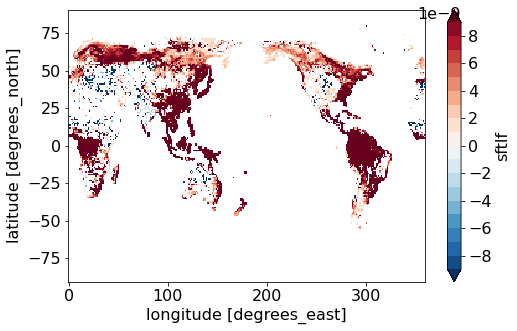

In [52]:
emiss_land_map_masked = emiss_land_map * emiss_land_mask
emiss_land_map_masked.plot(levels=np.arange(-9,10)*1e-9)




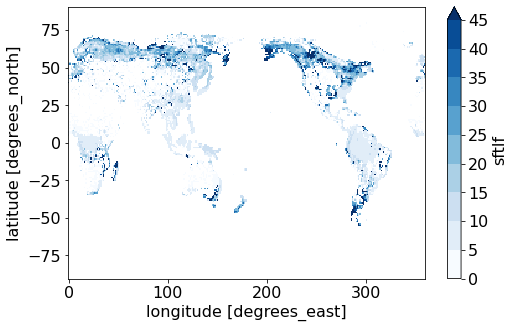

In [53]:
tau_land_masked = (tau_land_map*emiss_land_mask)
tau_land_masked.attrs['long_name'] = 'NBP response timescale (yr)'

tau_land_masked = np.minimum(tau_land_masked, 100.) * emiss_land_mask
tau_land_masked.plot(levels=np.arange(10)*5, cmap='Blues')

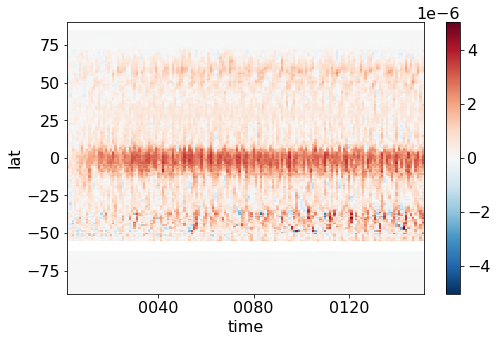

In [54]:
nbp_annual.mean(dim='lon').plot(y='lat',x='time')

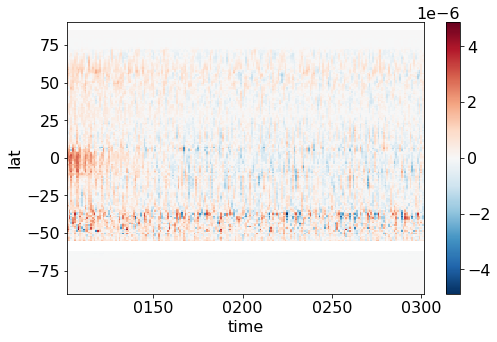

In [55]:
monthly_to_annual(-fin_zec_lnd['NEE']).mean(dim='lon').plot(y='lat',x='time')

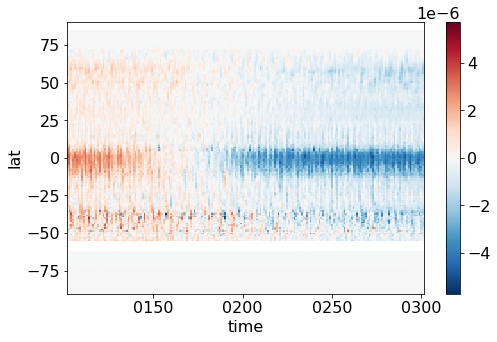

In [56]:
monthly_to_annual(-fin_cdr_lnd['NEE']).mean(dim='lon').plot(y='lat',x='time')

In [57]:
landmask = ((1.+nbp_annual.isel(time=0))/(1.+nbp_annual.isel(time=0))).drop('time')
#landmask
#

In [58]:
emiss_zec_xr = xr.DataArray(emiss_zec[100:], dims=['time'], coords=[np.arange(len(emiss_zec[100:]))])
cflux_spatial_emulator_zec = memory_xr(emiss_zec_xr, tau_land_masked, emiss_land_map_masked)

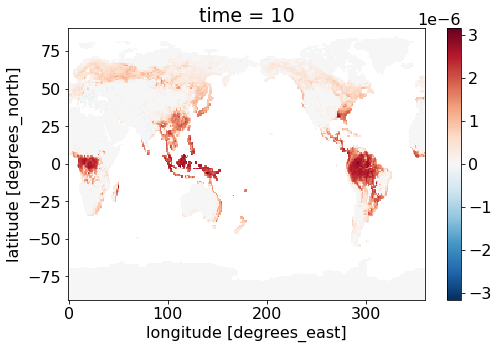

In [59]:
cflux_spatial_emulator_zec_noinfs = (cflux_spatial_emulator_zec * (np.isfinite(cflux_spatial_emulator_zec) / np.isfinite(cflux_spatial_emulator_zec)))
cflux_spatial_emulator_zec_noinfs = cflux_spatial_emulator_zec_noinfs.fillna(0)
cflux_spatial_emulator_zec_masked = cflux_spatial_emulator_zec_noinfs * landmask.data
cflux_spatial_emulator_zec_masked.isel(time=10).plot()


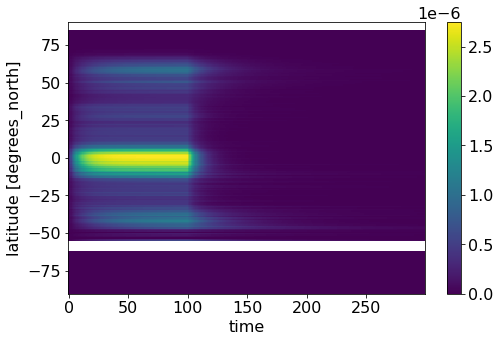

In [60]:
cflux_spatial_emulator_zec_masked.mean(dim='lon').plot(x='time')

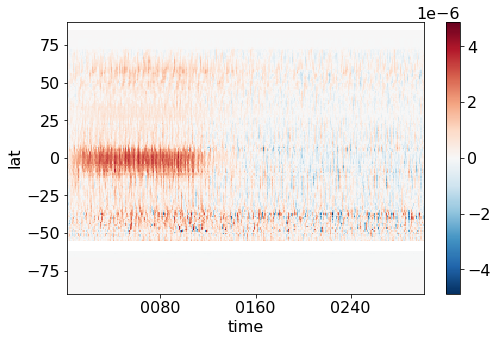

In [61]:
nbp_zec_annual_spatial = monthly_to_annual(xr.concat((-fin_flat10_lnd['NEE'].isel(time=slice(0,1200)),-fin_zec_lnd['NEE']),dim='time'))
nbp_zec_annual_spatial.mean(dim='lon').plot(x='time')


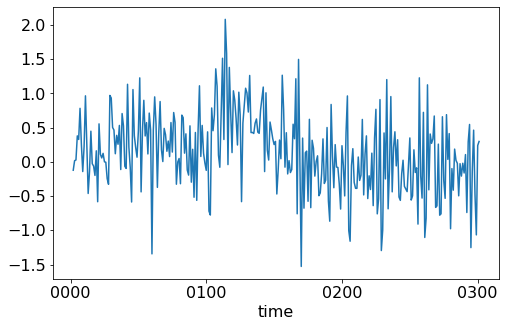

In [62]:
nbp_anoms_zec_annual_spatial = (nbp_zec_annual_spatial - cflux_spatial_emulator_zec_masked.data)
nbp_anoms_zec_global = 1e-15 * 86400 * 365 * (nbp_anoms_zec_annual_spatial * areacella['areacella'].data * sftlf['sftlf'].data/100. * (1. - sftgif['sftgif'].data/100.)).sum(dim=('lat', 'lon'))
nbp_anoms_zec_global.plot()

cflux_spatial_emulator_zec_global = 1e-15 * 86400 * 365 * (cflux_spatial_emulator_zec_masked * areacella['areacella'].data * sftlf['sftlf'].data/100. * (1. - sftgif['sftgif'].data/100.)).sum(dim=('lat', 'lon'))
#cdk

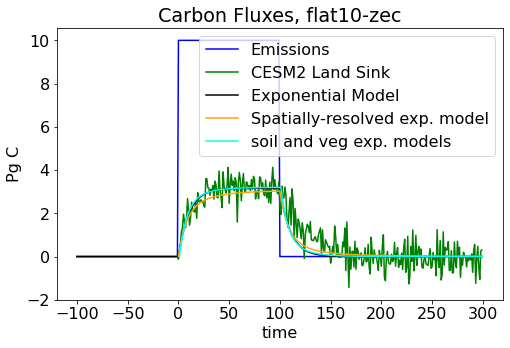

In [63]:
plt.plot(time_zec, emiss_zec, color='blue')
plt.plot(time_zec, landsink_zec, color='green')
plt.plot(time_zec, pred_landsink_zec, color='black')
plt.plot(np.arange(len(cflux_spatial_emulator_zec_global)), cflux_spatial_emulator_zec_global, color='orange')
plt.plot(np.arange(len(pred_dcdead_dt_zec))+1, pred_dcdead_dt_zec + pred_dcveg_dt_zec, color='cyan')



plt.title('Carbon Fluxes, flat10-zec')
plt.ylabel('Pg C')
plt.xlabel('time')
plt.legend(['Emissions','CESM2 Land Sink','Exponential Model', 'Spatially-resolved exp. model', 'soil and veg exp. models'])

plt.savefig('spatial_pool_zec_response', dpi=300)


In [64]:
deadc = fin_flat10_lnd['TOTSOMC'] + fin_flat10_lnd['TOTLITC'] + fin_flat10_lnd['CWDC']
d_deadc_dt = monthly_to_annual(deadc).diff(dim='time')


In [65]:
tau_deadc_map = sftlf['sftlf']/sftlf['sftlf']
emiss_deadc_map = sftlf['sftlf']/sftlf['sftlf']

client = Client(n_workers=8)

params_list = []
#for i in range(30,31):
for i in range(len(tau_land_map['lon'])):
    for j in range(len(tau_land_map['lat'])):
        if tau_deadc_map.isel(lat=j,lon=i) == 1.:
                params_out = client.submit(my_function, memory, emiss[101:], d_deadc_dt.isel(lat=j,lon=i), [12., 1e-1], i, j)
                params_list.append(params_out)
    #print('finished lon',i)
#tau_land_map.plot()
results = client.gather(params_list)
client.close()

/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/Users/CDKoven/miniforge3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g

/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered

/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered

/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in double_scalars
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow 

/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered

/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered

/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered

/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered

/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered

In [66]:
for l in range(len(results)):
    i,j, tau, a = results[l]
    tau_deadc_map[j,i] = tau
    emiss_deadc_map[j,i] = a

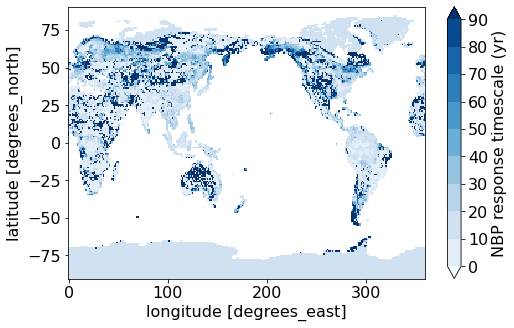

In [67]:
tau_deadc_map.attrs['long_name'] = 'NBP response timescale (yr)'
tau_deadc_map.plot(levels=np.arange(10)*10, cmap='Blues')

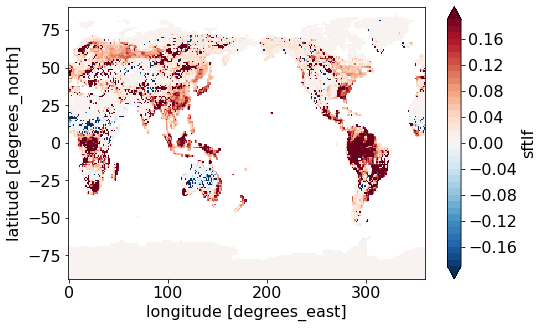

In [68]:
emiss_deadc_map.plot(levels=np.arange(-19,20)*1e-2)

In [69]:
vegc = fin_flat10_lnd['TOTVEGC']
d_vegc_dt = monthly_to_annual(vegc).diff(dim='time')


In [70]:
tau_vegc_map = sftlf['sftlf']/sftlf['sftlf']
emiss_vegc_map = sftlf['sftlf']/sftlf['sftlf']

client = Client(n_workers=8)

params_list = []
#for i in range(30,31):
for i in range(len(tau_land_map['lon'])):
    for j in range(len(tau_land_map['lat'])):
        if tau_vegc_map.isel(lat=j,lon=i) == 1.:
                params_out = client.submit(my_function, memory, emiss[101:], d_vegc_dt.isel(lat=j,lon=i), [12., 1e-1], i, j)
                params_list.append(params_out)
    #print('finished lon',i)
#tau_land_map.plot()
results = client.gather(params_list)
client.close()

/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/Users/CDKoven/miniforge3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g

/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered

/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered

/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in double_scalars
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow 

distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: over

/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered in exp
/var/folders/6g/x_x6jm6s1jq6fz2gmv70hhdh0000gp/T/ipykernel_75195/3872981137.py:7: RuntimeWarning: overflow encountered

In [71]:
for l in range(len(results)):
    i,j, tau, a = results[l]
    tau_vegc_map[j,i] = tau
    emiss_vegc_map[j,i] = a

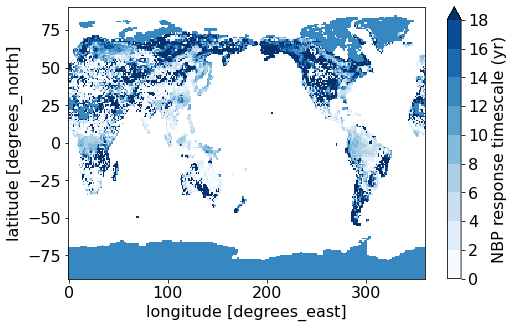

In [72]:
tau_vegc_map.attrs['long_name'] = 'NBP response timescale (yr)'
tau_vegc_map.plot(levels=np.arange(10)*2, cmap='Blues')

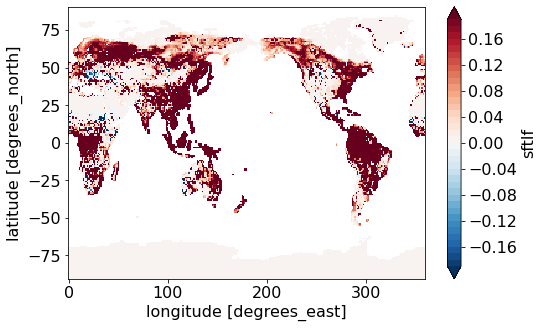

In [73]:
emiss_vegc_map.plot(levels=np.arange(-19,20)*1e-2)

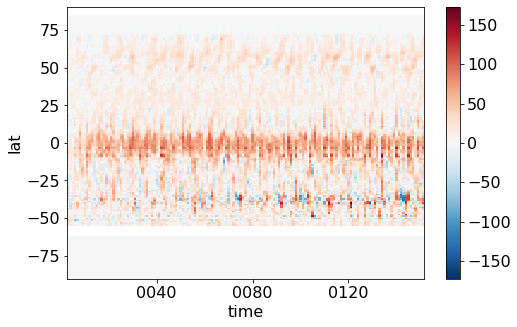

In [74]:
d_vegc_dt.mean(dim='lon').plot(x='time')

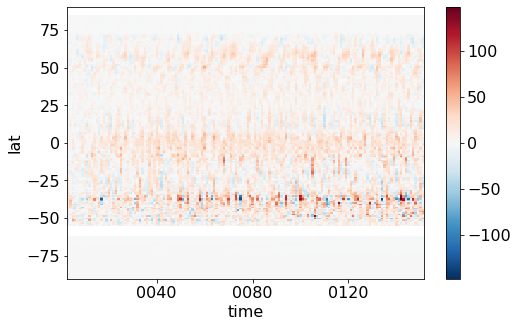

In [75]:
d_deadc_dt.mean(dim='lon').plot(x='time')

In [76]:
emiss_vegc_mask = (emiss_vegc_map /emiss_vegc_map) / ((np.abs(emiss_vegc_map) > 1.e-3) * (emiss_vegc_map < 1.e1))

emiss_vegc_map_masked = emiss_vegc_map * emiss_vegc_mask
tau_vegc_map_masked = (tau_vegc_map*emiss_vegc_mask)

dvegcdt_spatial_emulator_zec = memory_xr(emiss_zec_xr, tau_vegc_map_masked, emiss_vegc_map_masked)

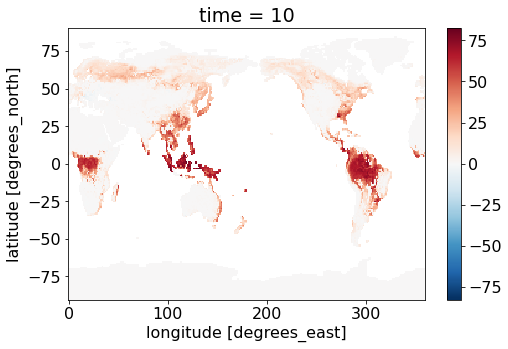

In [77]:
dvegcdt_spatial_emulator_zec_noinfs = (dvegcdt_spatial_emulator_zec * (np.isfinite(dvegcdt_spatial_emulator_zec) / np.isfinite(dvegcdt_spatial_emulator_zec)))
dvegcdt_spatial_emulator_zec_noinfs = dvegcdt_spatial_emulator_zec_noinfs.fillna(0)
dvegcdt_spatial_emulator_zec_masked = dvegcdt_spatial_emulator_zec_noinfs * landmask.data
dvegcdt_spatial_emulator_zec_masked.isel(time=10).plot()


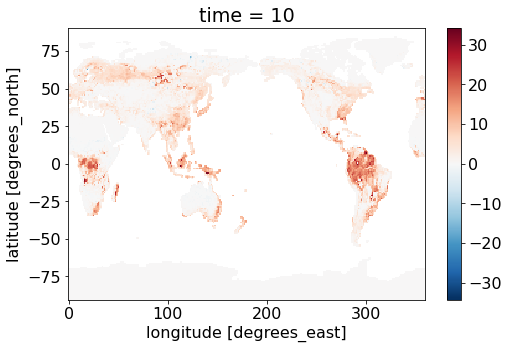

In [78]:
emiss_deadc_mask = (emiss_deadc_map /emiss_deadc_map) / ((np.abs(emiss_deadc_map) > 1.e-3) * (emiss_deadc_map < 1.e1))

emiss_deadc_map_masked = emiss_deadc_map * emiss_deadc_mask
tau_deadc_map_masked = (tau_deadc_map*emiss_deadc_mask)

ddeadcdt_spatial_emulator_zec = memory_xr(emiss_zec_xr, tau_deadc_map_masked, emiss_deadc_map_masked)

ddeadcdt_spatial_emulator_zec_noinfs = (ddeadcdt_spatial_emulator_zec * (np.isfinite(ddeadcdt_spatial_emulator_zec) / np.isfinite(ddeadcdt_spatial_emulator_zec)))
ddeadcdt_spatial_emulator_zec_noinfs = ddeadcdt_spatial_emulator_zec_noinfs.fillna(0)
ddeadcdt_spatial_emulator_zec_masked = ddeadcdt_spatial_emulator_zec_noinfs * landmask.data
ddeadcdt_spatial_emulator_zec_masked.isel(time=10).plot()


In [79]:
spatially_pool_resolved_global_dcdt_zec = 1e-15 * ((ddeadcdt_spatial_emulator_zec_masked + dvegcdt_spatial_emulator_zec_masked) * areacella['areacella'].data * sftlf['sftlf'].data/100. * (1. - sftgif['sftgif'].data/100.)).sum(dim=('lat', 'lon'))


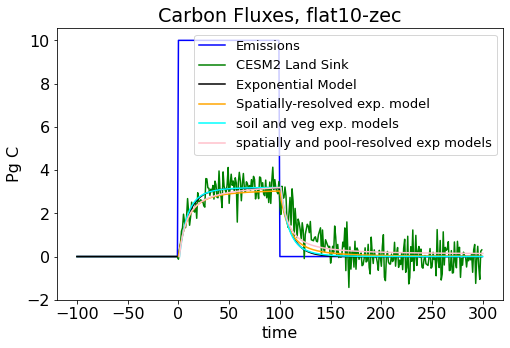

In [80]:
plt.plot(time_zec, emiss_zec, color='blue')
plt.plot(time_zec, landsink_zec, color='green')
plt.plot(time_zec, pred_landsink_zec, color='black')
plt.plot(np.arange(len(cflux_spatial_emulator_zec_global)), cflux_spatial_emulator_zec_global, color='orange')
plt.plot(np.arange(len(pred_dcdead_dt_zec))+1, pred_dcdead_dt_zec + pred_dcveg_dt_zec, color='cyan')
plt.plot(np.arange(len(spatially_pool_resolved_global_dcdt_zec))+1, spatially_pool_resolved_global_dcdt_zec, color='pink')



plt.title('Carbon Fluxes, flat10-zec')
plt.ylabel('Pg C')
plt.xlabel('time')
#plt.xrange([-5,5])
plt.legend(['Emissions','CESM2 Land Sink','Exponential Model', 'Spatially-resolved exp. model', 'soil and veg exp. models', 'spatially and pool-resolved exp models'], prop={'size': 13})
plt.savefig('spatially_pool_resolved_zec_response', dpi=300)


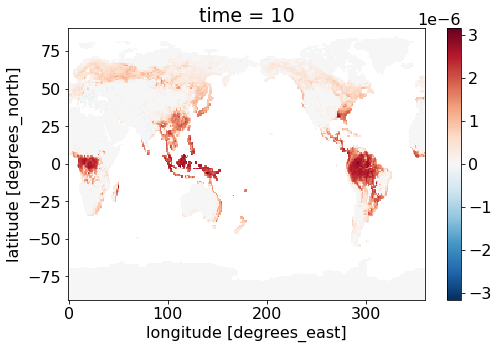

In [81]:
emiss_cdr_xr = xr.DataArray(emiss_cdr[100:], dims=['time'], coords=[np.arange(len(emiss_cdr[100:]))])
cflux_spatial_emulator_cdr = memory_xr(emiss_cdr_xr, tau_land_masked, emiss_land_map_masked)

cflux_spatial_emulator_cdr_noinfs = (cflux_spatial_emulator_cdr * (np.isfinite(cflux_spatial_emulator_cdr) / np.isfinite(cflux_spatial_emulator_cdr)))
cflux_spatial_emulator_cdr_noinfs = cflux_spatial_emulator_cdr_noinfs.fillna(0)
cflux_spatial_emulator_cdr_masked = cflux_spatial_emulator_cdr_noinfs * landmask.data
cflux_spatial_emulator_cdr_masked.isel(time=10).plot()

cflux_spatial_emulator_cdr_global = 1e-15 * 86400 * 365 * (cflux_spatial_emulator_cdr_masked * areacella['areacella'].data * sftlf['sftlf'].data/100. * (1. - sftgif['sftgif'].data/100.)).sum(dim=('lat', 'lon'))



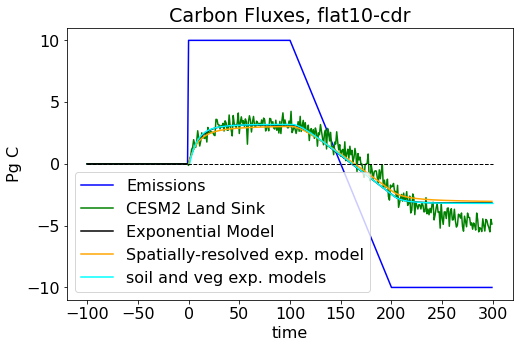

In [82]:
plt.plot(time_cdr, emiss_cdr, color='blue')
plt.plot(time_cdr, landsink_cdr, color='green')
plt.plot(time_cdr, pred_landsink_cdr, color='black')
plt.plot(np.arange(len(cflux_spatial_emulator_cdr_global)), cflux_spatial_emulator_cdr_global, color='orange')
plt.plot(np.arange(len(pred_dcdead_dt_cdr))+1, pred_dcdead_dt_cdr + pred_dcveg_dt_cdr, color='cyan')

plt.title('Carbon Fluxes, flat10-cdr')
plt.ylabel('Pg C')
plt.xlabel('time')
plt.legend(['Emissions','CESM2 Land Sink','Exponential Model', 'Spatially-resolved exp. model', 'soil and veg exp. models'])
plt.hlines(0., -100, 300, color='black', linestyle='dashed', linewidth=1)
plt.savefig('spatial_pool_cdr_response', dpi=300)


In [83]:
dvegcdt_spatial_emulator_cdr = memory_xr(emiss_cdr_xr, tau_vegc_map_masked, emiss_vegc_map_masked)

dvegcdt_spatial_emulator_cdr_noinfs = (dvegcdt_spatial_emulator_cdr * (np.isfinite(dvegcdt_spatial_emulator_cdr) / np.isfinite(dvegcdt_spatial_emulator_cdr)))
dvegcdt_spatial_emulator_cdr_noinfs = dvegcdt_spatial_emulator_cdr_noinfs.fillna(0)
dvegcdt_spatial_emulator_cdr_masked = dvegcdt_spatial_emulator_cdr_noinfs * landmask.data
#dvegcdt_spatial_emulator_cdr_masked.isel(time=10).plot()


ddeadcdt_spatial_emulator_cdr = memory_xr(emiss_cdr_xr, tau_deadc_map_masked, emiss_deadc_map_masked)

ddeadcdt_spatial_emulator_cdr_noinfs = (ddeadcdt_spatial_emulator_cdr * (np.isfinite(ddeadcdt_spatial_emulator_cdr) / np.isfinite(ddeadcdt_spatial_emulator_cdr)))
ddeadcdt_spatial_emulator_cdr_noinfs = ddeadcdt_spatial_emulator_cdr_noinfs.fillna(0)
ddeadcdt_spatial_emulator_cdr_masked = ddeadcdt_spatial_emulator_cdr_noinfs * landmask.data
#ddeadcdt_spatial_emulator_cdr_masked.isel(time=10).plot()


spatially_pool_resolved_global_dcdt_cdr = 1e-15 * ((ddeadcdt_spatial_emulator_cdr_masked + dvegcdt_spatial_emulator_cdr_masked) * areacella['areacella'].data * sftlf['sftlf'].data/100. * (1. - sftgif['sftgif'].data/100.)).sum(dim=('lat', 'lon'))

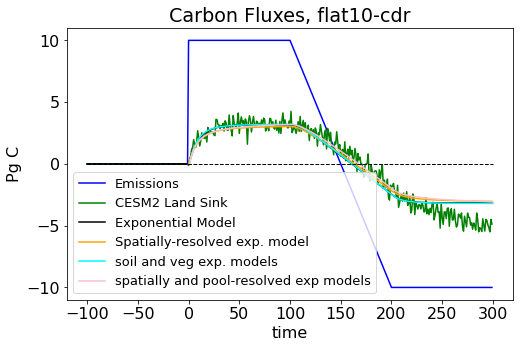

In [84]:
plt.plot(time_cdr, emiss_cdr, color='blue')
plt.plot(time_cdr, landsink_cdr, color='green')
plt.plot(time_cdr, pred_landsink_cdr, color='black')
plt.plot(np.arange(len(cflux_spatial_emulator_cdr_global)), cflux_spatial_emulator_cdr_global, color='orange')
plt.plot(np.arange(len(pred_dcdead_dt_cdr))+1, pred_dcdead_dt_cdr + pred_dcveg_dt_cdr, color='cyan')
plt.plot(np.arange(len(spatially_pool_resolved_global_dcdt_cdr))+1, spatially_pool_resolved_global_dcdt_cdr, color='pink')



plt.title('Carbon Fluxes, flat10-cdr')
plt.ylabel('Pg C')
plt.xlabel('time')
#plt.xrange([-5,5])
plt.hlines(0., -100, 300, color='black', linestyle='dashed', linewidth=1)
plt.legend(['Emissions','CESM2 Land Sink','Exponential Model', 'Spatially-resolved exp. model', 'soil and veg exp. models', 'spatially and pool-resolved exp models'], prop={'size': 13})
plt.savefig('spatially_pool_resolved_cdr_response', dpi=300)


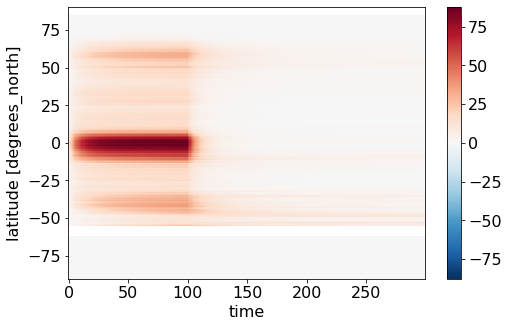

In [85]:
(ddeadcdt_spatial_emulator_zec_masked + dvegcdt_spatial_emulator_zec_masked).mean(dim='lon').plot(x='time',y='lat')


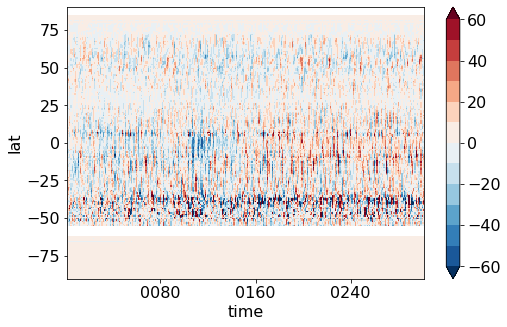

In [86]:
nbp_annual_zec = xr.concat((nbp_annual[0:100],-monthly_to_annual(fin_zec_lnd['NEE'])),dim='time')


zec_spatial_diff = ((ddeadcdt_spatial_emulator_zec_masked + dvegcdt_spatial_emulator_zec_masked).data - (nbp_annual_zec*86400*365))
zec_spatial_diff.mean(dim='lon').plot(x='time',y='lat', levels= np.arange(-60,70,10))


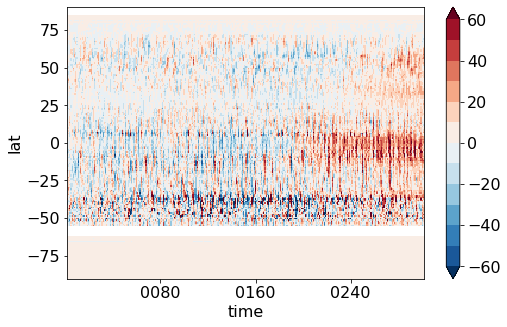

In [87]:
nbp_annual_cdr = xr.concat((nbp_annual[0:100],-monthly_to_annual(fin_cdr_lnd['NEE'])),dim='time')


cdr_spatial_diff = ((ddeadcdt_spatial_emulator_cdr_masked + dvegcdt_spatial_emulator_cdr_masked).data - (nbp_annual_cdr*86400*365))
cdr_spatial_diff.mean(dim='lon').plot(x='time',y='lat', levels= np.arange(-60,70,10))


In [89]:
emiss_xr = xr.DataArray(emiss, dims=['time'], coords=[np.arange(len(emiss))])

cflux_spatial_emulator_flat10 = memory_xr(emiss_xr, tau_land_masked, emiss_land_map_masked)
cflux_spatial_emulator_flat10_noinfs = (cflux_spatial_emulator_flat10 * (np.isfinite(cflux_spatial_emulator_flat10) / np.isfinite(cflux_spatial_emulator_flat10)))
cflux_spatial_emulator_flat10_noinfs = cflux_spatial_emulator_flat10_noinfs.fillna(0)
cflux_spatial_emulator_flat10_masked = cflux_spatial_emulator_flat10_noinfs * landmask.data
#cflux_spatial_emulator_flat10_masked.isel(time=10).plot()
cflux_spatial_emulator_flat10_global = 1e-15 * 86400 * 365 * (cflux_spatial_emulator_flat10_masked * areacella['areacella'].data * sftlf['sftlf'].data/100. * (1. - sftgif['sftgif'].data/100.)).sum(dim=('lat', 'lon'))



In [90]:
dvegcdt_spatial_emulator_flat10 = memory_xr(emiss_xr, tau_vegc_map_masked, emiss_vegc_map_masked)

dvegcdt_spatial_emulator_flat10_noinfs = (dvegcdt_spatial_emulator_flat10 * (np.isfinite(dvegcdt_spatial_emulator_flat10) / np.isfinite(dvegcdt_spatial_emulator_flat10)))
dvegcdt_spatial_emulator_flat10_noinfs = dvegcdt_spatial_emulator_flat10_noinfs.fillna(0)
dvegcdt_spatial_emulator_flat10_masked = dvegcdt_spatial_emulator_flat10_noinfs * landmask.data
#dvegcdt_spatial_emulator_flat10_masked.isel(time=10).plot()


ddeadcdt_spatial_emulator_flat10 = memory_xr(emiss_xr, tau_deadc_map_masked, emiss_deadc_map_masked)

ddeadcdt_spatial_emulator_flat10_noinfs = (ddeadcdt_spatial_emulator_flat10 * (np.isfinite(ddeadcdt_spatial_emulator_flat10) / np.isfinite(ddeadcdt_spatial_emulator_flat10)))
ddeadcdt_spatial_emulator_flat10_noinfs = ddeadcdt_spatial_emulator_flat10_noinfs.fillna(0)
ddeadcdt_spatial_emulator_flat10_masked = ddeadcdt_spatial_emulator_flat10_noinfs * landmask.data
#ddeadcdt_spatial_emulator_flat10_masked.isel(time=10).plot()


spatially_pool_resolved_global_dcdt_flat10 = 1e-15 * ((ddeadcdt_spatial_emulator_flat10_masked + dvegcdt_spatial_emulator_flat10_masked) * areacella['areacella'].data * sftlf['sftlf'].data/100. * (1. - sftgif['sftgif'].data/100.)).sum(dim=('lat', 'lon'))

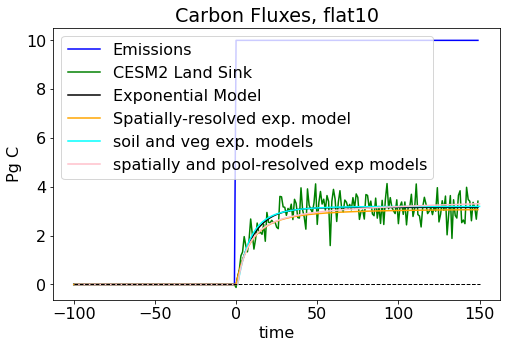

In [91]:

plt.plot(time, emiss, color='blue')
plt.plot(time, landsink_flat10, color='green')
plt.plot(time, pred_landsink, color='black')
plt.plot(time, cflux_spatial_emulator_flat10_global, color='orange')
plt.plot(np.arange(len(pred_dcdead_dt_flat10))+1, pred_dcdead_dt_flat10 + pred_dcveg_dt_flat10, color='cyan')
plt.plot(np.arange(len(spatially_pool_resolved_global_dcdt_flat10))+1-100, spatially_pool_resolved_global_dcdt_flat10, color='pink')


plt.title('Carbon Fluxes, flat10')
plt.ylabel('Pg C')
plt.xlabel('time')
plt.hlines(0., -100, 150, color='black', linestyle='dashed', linewidth=1)
plt.legend(['Emissions','CESM2 Land Sink','Exponential Model', 'Spatially-resolved exp. model', 'soil and veg exp. models', 'spatially and pool-resolved exp models'])